## Stock Data Cleaning + Volatility Visualization

In [283]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

In [284]:
df = yf.download("AAPL",start="2010-01-01",end="2025-08-27", multi_level_index=False)
df










C:\Users\Samneh\AppData\Local\Temp\ipykernel_6960\1697709100.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL",start="2010-01-01",end="2025-08-27", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.424606,6.439316,6.375674,6.407195,493729600
2010-01-05,6.435711,6.472036,6.401788,6.442316,601904800
2010-01-06,6.333344,6.461229,6.326739,6.435712,552160000
2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
2010-01-08,6.363665,6.364265,6.276007,6.313231,447610800
...,...,...,...,...,...
2025-08-20,226.009995,230.470001,225.770004,229.979996,42263900
2025-08-21,224.899994,226.520004,223.779999,226.270004,30621200
2025-08-22,227.759995,229.089996,225.410004,226.169998,42477800


In [285]:
# Ensuring the data is clean
df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

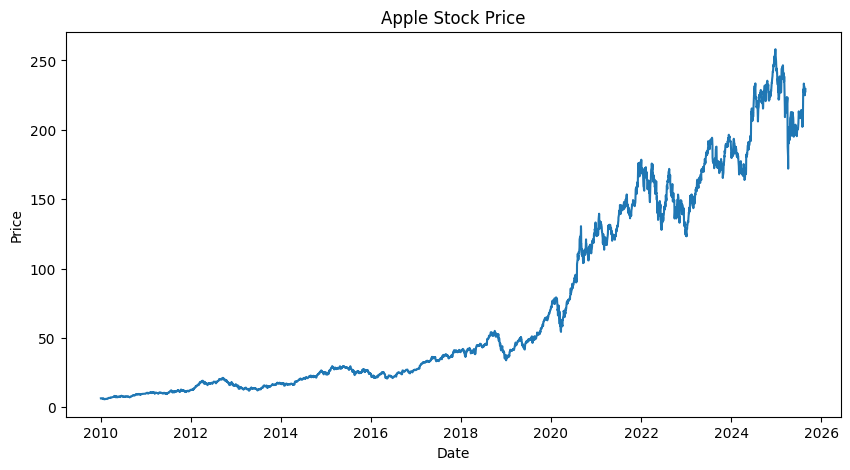

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [287]:
df_Example = df.copy()

import random 

for x in range(100):
    randinteger = random.randint(0, len(df)-1)  # Get random position
    df_Example.iloc[randinteger, df.columns.get_loc('Close')] = np.nan

# random_indices = random.sample(range(len(df_Example)), 200)
# df_Example.iloc[random_indices, df_Example.columns.get_loc('Close')] = np.nan



In [288]:
df_Example.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.424606,6.439316,6.375674,6.407195,493729600
2010-01-05,6.435711,6.472036,6.401788,6.442316,601904800
2010-01-06,6.333344,6.461229,6.326739,6.435712,552160000
2010-01-07,6.321636,6.364265,6.275705,6.356760,477131200
2010-01-08,6.363665,6.364265,6.276007,6.313231,447610800


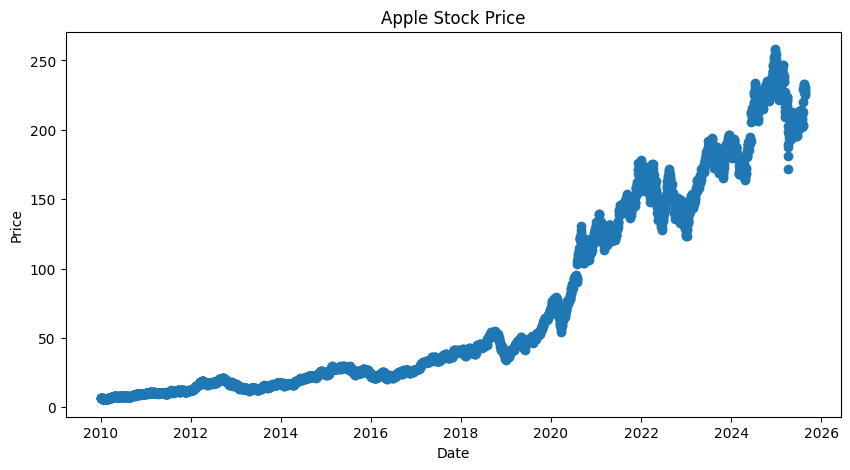

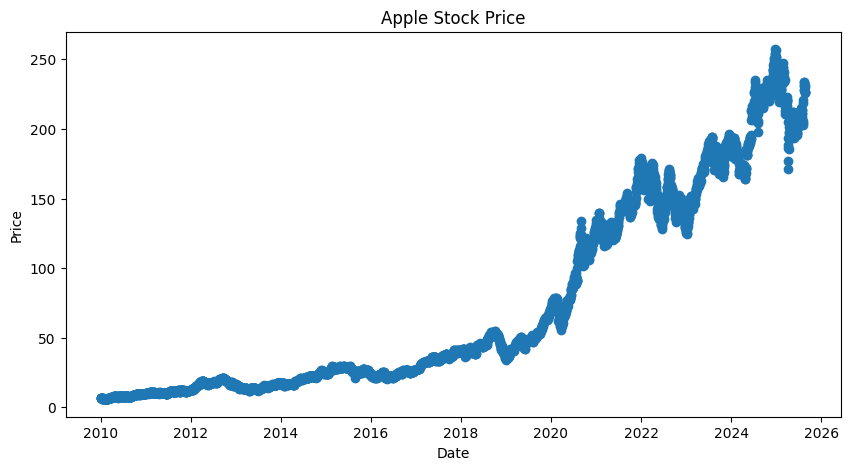

In [289]:
# plt.figure(figsize=(10,5))
# plt.plot(df.index,df['Close'])
# plt.title('Apple Stock Price')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.show()

plt.figure(figsize=(10,5))
plt.scatter(df_Example.index,df_Example['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
# now to zoom into the missing values
plt.figure(figsize=(10,5))
plt.scatter(df_Example.index,df_Example['Open'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()






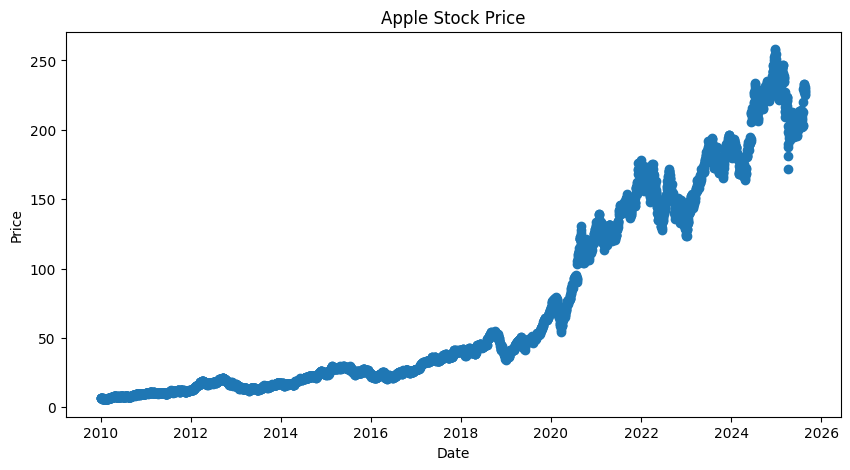

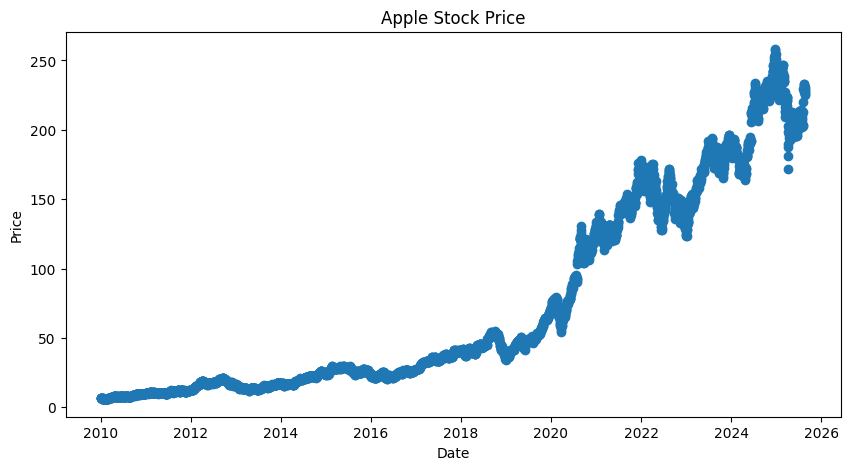

In [290]:

# We see the effects of both forward and backward fills

df_ffilled =df_Example.ffill()

plt.figure(figsize=(10,5))
plt.scatter(df_ffilled.index,  df_ffilled['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



df_bfilled =df_Example.bfill()

plt.figure(figsize=(10,5))
plt.scatter(df_bfilled.index,  df_bfilled['Close'])
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()





In [291]:
print("Description of the Forward Filled Data")
print(df_ffilled['Close'].describe())
print("--------------------------------------")
print("Description of the Backward Filled Data")
print(df_bfilled['Close'].describe())


Description of the Forward Filled Data
count    3936.000000
mean       73.479715
std        70.642933
min         5.765363
25%        17.990463
50%        37.302193
75%       138.850979
max       258.103729
Name: Close, dtype: float64
--------------------------------------
Description of the Backward Filled Data
count    3936.000000
mean       73.482644
std        70.641950
min         5.765363
25%        17.990463
50%        37.195946
75%       138.939659
max       258.103729
Name: Close, dtype: float64


In [292]:
df['Returns'] = df['Close'].pct_change()
df['Returns'] = df['Returns'].fillna(0)
print(df['Returns'].head())

Date
2010-01-04    0.000000
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
Name: Returns, dtype: float64


In [293]:
# Calculate log returns
df['Log_Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['Log_Returns'] = df['Log_Returns'].fillna(0)

print(df['Log_Returns'].head())

Date
2010-01-04    0.000000
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
Name: Log_Returns, dtype: float64


In [294]:
# Calculate rolling volatility (standard deviation of returns)
# Common periods: 20 days (monthly), 60 days (quarterly), 252 days (annual)

# 20-day rolling volatility
df['Volatility_20d'] = df['Returns'].rolling(window=20).std() * np.sqrt(252)  # Annualized

# 60-day rolling volatility  
df['Volatility_60d'] = df['Returns'].rolling(window=60).std() * np.sqrt(252)

print(df[['Returns', 'Volatility_20d', 'Volatility_60d']].tail())

             Returns  Volatility_20d  Volatility_60d
Date                                                
2025-08-20 -0.019735        0.306605        0.221424
2025-08-21 -0.004911        0.307435        0.216776
2025-08-22  0.012717        0.309296        0.217863
2025-08-25 -0.002634        0.309915        0.217889
2025-08-26  0.009465        0.304551        0.218346


In [295]:
# Calculate overall volatility statistics
print("Volatility Statistics:")
print(f"Daily Volatility: {df['Returns'].std():.4f}")
print(f"Annualized Volatility: {df['Returns'].std() * np.sqrt(252):.4f}")
print(f"Average 20-day Volatility: {df['Volatility_20d'].mean():.4f}")

Volatility Statistics:
Daily Volatility: 0.0178
Annualized Volatility: 0.2832
Average 20-day Volatility: 0.2592


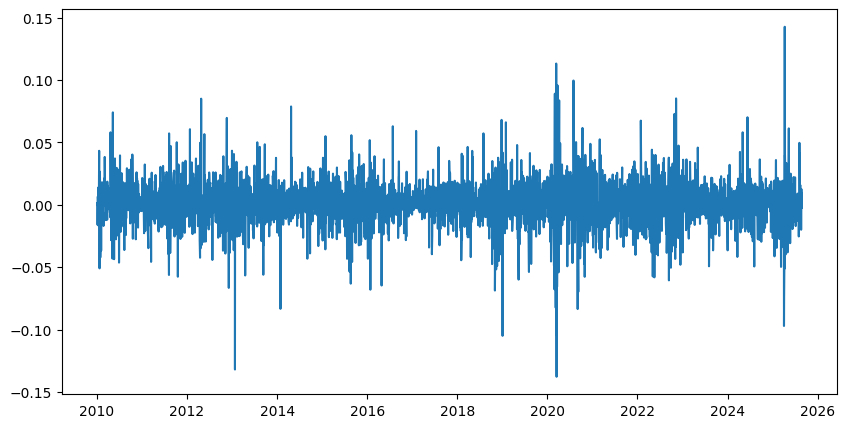

In [296]:
plt.figure(figsize=(10,5))
plt.plot(df.index,df['Log_Returns'])

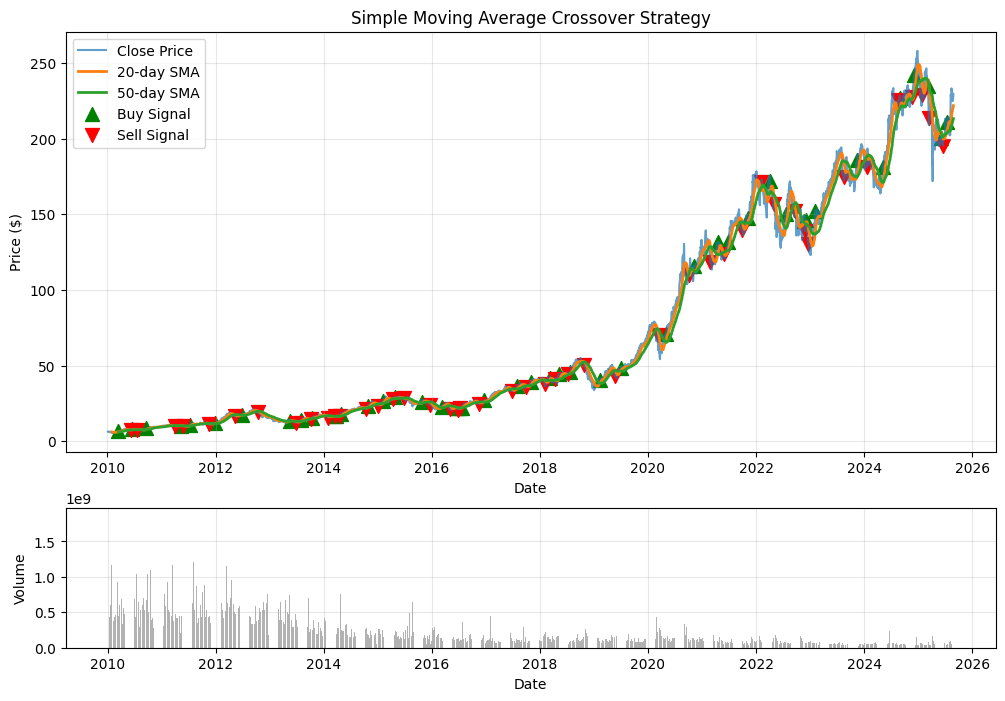

In [297]:
# Calculate crossover signals
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Generate signals
df['Signal'] = np.where(df['SMA_20'] > df['SMA_50'], 1, 0)
df['Signal_Change'] = df['Signal'].diff()

# Plot with buy/sell signals
ax1.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
ax1.plot(df.index, df['SMA_20'], label='20-day SMA', linewidth=2)
ax1.plot(df.index, df['SMA_50'], label='50-day SMA', linewidth=2)

# Mark buy signals (when 20-day crosses above 50-day)
buy_signals = df[df['Signal_Change'] == 1]
sell_signals = df[df['Signal_Change'] == -1]

ax1.scatter(buy_signals.index, buy_signals['Close'], 
           color='green', marker='^', s=100, label='Buy Signal')
ax1.scatter(sell_signals.index, sell_signals['Close'], 
           color='red', marker='v', s=100, label='Sell Signal')

ax1.set_title('Simple Moving Average Crossover Strategy')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)


# Volume
ax2.bar(df.index, df['Volume'], alpha=0.6, color='gray')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(True, alpha=0.3)



plt.show()

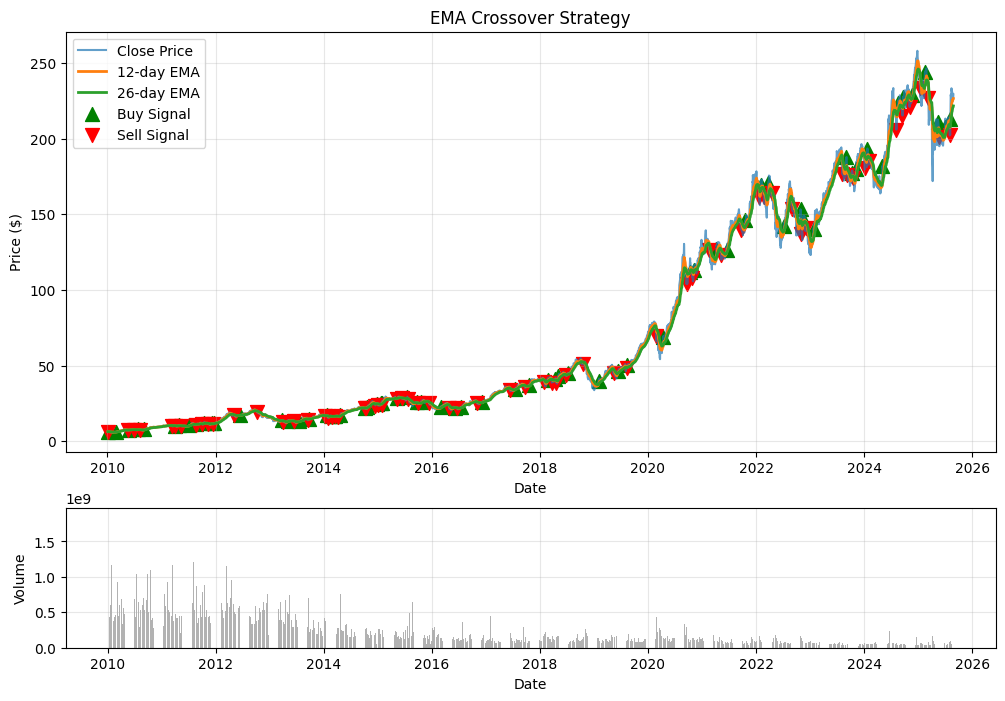

In [298]:
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})
# Buy signal: EMA_12 crosses above EMA_26
buy_signals = (df['EMA_12'] > df['EMA_26']) & (df['EMA_12'].shift(1) <= df['EMA_26'].shift(1))

# Sell signal: EMA_12 crosses below EMA_26
sell_signals = (df['EMA_12'] < df['EMA_26']) & (df['EMA_12'].shift(1) >= df['EMA_26'].shift(1))

# Plot

ax1.plot(df.index, df['Close'], label='Close Price', alpha=0.7)
ax1.plot(df.index, df['EMA_12'], label='12-day EMA', linewidth=2)
ax1.plot(df.index, df['EMA_26'], label='26-day EMA', linewidth=2)

# Plot buy/sell signals
ax1.scatter(df.index[buy_signals], df['Close'][buy_signals], color='green', marker='^', s=100, label='Buy Signal')
ax1.scatter(df.index[sell_signals], df['Close'][sell_signals], color='red', marker='v', s=100, label='Sell Signal')

ax1.set_title('EMA Crossover Strategy')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)



# Volume
ax2.bar(df.index, df['Volume'], alpha=0.6, color='gray')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.grid(True, alpha=0.3)



plt.show()






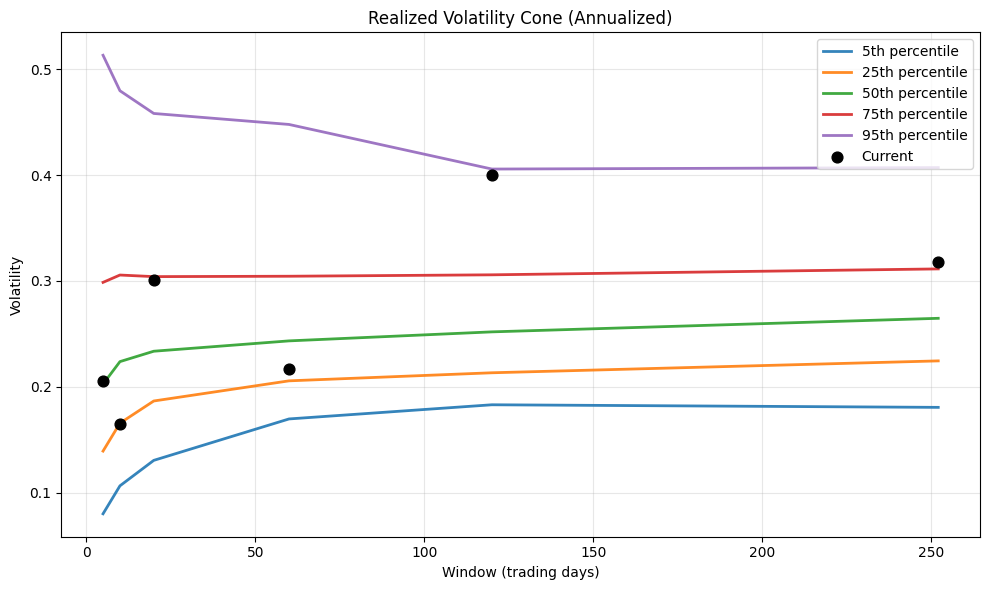

In [299]:
# 2) Choose windows (in trading days)
windows = [5, 10, 20, 60, 120, 252]  # 1w, 2w, 1m, 3m, 6m, 1y approx.

# 3) Compute annualized rolling volatility for each window
rolling_vols = {}
for w in windows:
    # Realized vol = std of returns over window, annualized by sqrt(252)
    rolling_vols[w] = df['Log_Returns'].rolling(w).std() * np.sqrt(252)

# 4) Build percentile table (e.g., 5/25/50/75/95)
percentiles = [5, 25, 50, 75, 95]
cone = pd.DataFrame(index=windows, columns=[f'p{p}' for p in percentiles], dtype=float)

for w in windows:
    series = rolling_vols[w].dropna()
    if len(series) > 0:
        cone.loc[w, :] = [np.nanpercentile(series, p) for p in percentiles]
    else:
        cone.loc[w, :] = np.nan

# 5) Current (most recent) realized vols per window (to overlay as markers)
current_vols = []
for w in windows:
    v = rolling_vols[w].iloc[-1] if rolling_vols[w].notna().any() else np.nan
    current_vols.append(v)

# 6) Plot the volatility cone
plt.figure(figsize=(10, 6))
for p in percentiles:
    plt.plot(windows, cone[f'p{p}'].astype(float), label=f'{p}th percentile', linewidth=2, alpha=0.9)

# Overlay current vols
plt.scatter(windows, current_vols, color='black', s=60, zorder=5, label='Current')

plt.title('Realized Volatility Cone (Annualized)')
plt.xlabel('Window (trading days)')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()